<a href="https://colab.research.google.com/github/xili5979/CS61-1/blob/main/Model_test1_V4_0_ipynb%EF%BC%88gordon%EF%BC%89225_300_0_00001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
from glob import glob
import cv2
import matplotlib.pyplot as plt
import re

from numpy.random import seed
seed(101)
# from tensorflow import set_random_seed
# set_random_seed(101)
import os, cv2
import pandas as pd
import numpy as np
#import keras
#from keras import backend as K
from tensorflow import keras

import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [4]:
# 
# shutil.rmtree("/content/base_dir")

GPU

In [5]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Sep 29 13:19:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    33W / 250W |    345MiB / 16280MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Load DATA**

## **Load img**

In [7]:
!unzip '/content/drive/MyDrive/5703File/DataSet/dataverse_files/part_1_64.zip' -d '/content/HAM10000_images_part_1/'
!unzip '/content/drive/MyDrive/5703File/DataSet/dataverse_files/part_2_64.zip' -d '/content/HAM10000_images_part_2/'

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/HAM10000_images_part_2/ISIC_0029321.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029322.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029323.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029324.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029325.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029326.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029327.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029328.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029329.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029330.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029331.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029332.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029333.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029334.jpg  
  inflating: /content/HAM10000_images_part_2/ISIC_0029335.jpg  
  inflating: 

In [8]:
# !unzip '/content/drive/MyDrive/5703File/DataSet/dataverse_files/HAM10000_images_part_1' -d '/content/HAM10000_images_part_1/'
# !unzip '/content/drive/MyDrive/5703File/DataSet/dataverse_files/HAM10000_images_part_2' -d '/content/HAM10000_images_part_2/'

10015


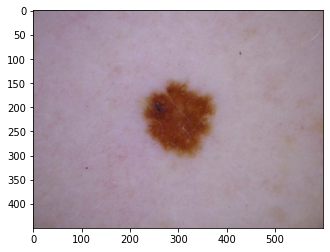

In [9]:
image_part1 = '/content/HAM10000_images_part_1'
image_part2 =  '/content/HAM10000_images_part_2'
images1 = glob("/content/HAM10000_images_part_1/*.jpg")
images2 = glob("/content/HAM10000_images_part_2/*.jpg")
all_images = images1+images2
print(len(all_images))
image0 = cv2.imread(all_images[777])
plt.imshow(image0[:,:,::-1])

## **Load CSV**

In [10]:
df = pd.read_csv ('/content/drive/MyDrive/5703File/DataSet/dataverse_files/HAM10000_metadata')
print(df)

         lesion_id      image_id     dx  ...     sex  localization       dataset
0      HAM_0000118  ISIC_0027419    bkl  ...    male         scalp  vidir_modern
1      HAM_0000118  ISIC_0025030    bkl  ...    male         scalp  vidir_modern
2      HAM_0002730  ISIC_0026769    bkl  ...    male         scalp  vidir_modern
3      HAM_0002730  ISIC_0025661    bkl  ...    male         scalp  vidir_modern
4      HAM_0001466  ISIC_0031633    bkl  ...    male           ear  vidir_modern
...            ...           ...    ...  ...     ...           ...           ...
10010  HAM_0002867  ISIC_0033084  akiec  ...    male       abdomen  vidir_modern
10011  HAM_0002867  ISIC_0033550  akiec  ...    male       abdomen  vidir_modern
10012  HAM_0002867  ISIC_0033536  akiec  ...    male       abdomen  vidir_modern
10013  HAM_0000239  ISIC_0032854  akiec  ...    male          face  vidir_modern
10014  HAM_0003521  ISIC_0032258    mel  ...  female          back  vidir_modern

[10015 rows x 8 columns]


In [11]:
d_type = list(df.dx)
set(d_type)

{'akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'}

In [12]:
print("akiec: %d" %d_type.count('akiec'))
print("bcc: %d" %d_type.count('bcc'))
print("bkl: %d" %d_type.count('bkl'))
print("df: %d" %d_type.count('df'))
print("mel: %d" %d_type.count('mel'))
print("nv: %d" %d_type.count('nv'))
print("vasc: %d" %d_type.count('vasc'))

akiec: 327
bcc: 514
bkl: 1099
df: 115
mel: 1113
nv: 6705
vasc: 142


#**CREATE FOLDERS INSIDE THE TRAIN, VALIDATION AND TEST FOLDERS**
## Dont run again

In [13]:
# Create a new directory
base_dir = '/content/base_dir'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 7 folders inside 'base_dir':

# train_dir
    # nv
    # mel
    # bkl
    # bcc
    # akiec
    # vasc
    # df
 
# val_dir
    # nv
    # mel
    # bkl
    # bcc
    # akiec
    # vasc
    # df

# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN, VALIDATION AND TEST FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)



# create new folders inside val_dir
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

# **Train，validation**

In [14]:
df_data = pd.read_csv ('/content/drive/MyDrive/5703File/DataSet/dataverse_files/HAM10000_metadata')
df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [15]:
# this will tell us how many images are associated with each lesion_id
df = df_data.groupby('lesion_id').count()

In [16]:
df

,image_id,dx,dx_type,age,sex,localization,dataset
lesion_id,,,,,,,
HAM_0000000,2,2,2,2,2,2,2
HAM_0000001,1,1,1,1,1,1,1
HAM_0000002,3,3,3,3,3,3,3
HAM_0000003,1,1,1,1,1,1,1
HAM_0000004,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
HAM_0007624,1,1,1,1,1,1,1
HAM_0007625,2,2,2,2,2,2,2
HAM_0007626,1,1,1,1,1,1,1


In [17]:
# now we filter out lesion_id's that have only one image associated with it
df = df[df['image_id'] == 1]

df.reset_index(inplace=True)

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000001,1,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1,1


In [18]:
# here we identify lesion_id's that have duplicate images and those that have only one image.

def identify_duplicates(x):
    
    unique_list = list(df['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df_data['duplicates'] = df_data['lesion_id']
# apply the function to this new column
df_data['duplicates'] = df_data['duplicates'].apply(identify_duplicates)

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,has_duplicates


In [19]:
df_data['duplicates'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [20]:
# now we filter out images that don't have duplicates
df = df_data[df_data['duplicates'] == 'no_duplicates']

df.shape
# now we create a val set using df because we are sure that none of these images
# have augmented duplicates in the train set
y = df['dx']

_, df_val = train_test_split(df, test_size=0.20, random_state=101, stratify=y)

df_val.shape

(1103, 9)

### **Create a train set that excludes images that are in the val set**

In [21]:
# This set will be df_data excluding all rows that are in the val set

# This function identifies if an image is part of the train
# or val set.
def identify_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id'])
    
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

# identify train and val rows

# create a new colum that is a copy of the image_id column
df_data['train_or_val'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)
   
# filter out train rows
df_train = df_data[df_data['train_or_val'] == 'train']


print(len(df_train))
print(len(df_val))

8912
1103


In [22]:
df_train['dx'].value_counts()

nv       5822
mel      1067
bkl      1011
bcc       479
akiec     297
vasc      129
df        107
Name: dx, dtype: int64

In [23]:
df_val['dx'].value_counts()

nv       883
bkl       88
mel       46
bcc       35
akiec     30
vasc      13
df         8
Name: dx, dtype: int64

### **Transfer the Images into the Folders**

In [24]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [25]:
df_data

,lesion_id,dx,dx_type,age,sex,localization,dataset,duplicates,train_or_val
image_id,,,,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates,train
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates,train
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates,train
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates,train
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,vidir_modern,has_duplicates,train
...,...,...,...,...,...,...,...,...,...
ISIC_0033084,HAM_0002867,akiec,histo,40.0,male,abdomen,vidir_modern,has_duplicates,train
ISIC_0033550,HAM_0002867,akiec,histo,40.0,male,abdomen,vidir_modern,has_duplicates,train
ISIC_0033536,HAM_0002867,akiec,histo,40.0,male,abdomen,vidir_modern,has_duplicates,train


In [26]:
# Get a list of images in each of the two folders
folder_1 = os.listdir(image_part1)
folder_2 = os.listdir(image_part2)

# Get a list of train and val images
train_images = list(df_train.image_id)
train_labels = list(df_train.dx)
validation_images = list(df_val.image_id)
validation_labels = list(df_val.dx)


In [27]:
df_train

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,duplicates,train_or_val
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates,train
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates,train
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates,train
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,has_duplicates,train
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,has_duplicates,train
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,has_duplicates,train
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,has_duplicates,train
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,has_duplicates,train
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,has_duplicates,train


In [28]:
# Transfer the train images

for image in tqdm(train_images):
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join(image_part1, fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        # image = cv2.imread(src)
        # image =hair_remove(image)
        # cv2.imwrite(dst,image)

    if fname in folder_2:
        # source path to image
        src = os.path.join(image_part2, fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


# Transfer the val images

for image in tqdm(validation_images):
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join(image_part1, fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join(image_part2, fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

100%|██████████| 1103/1103 [00:00<00:00, 2281.04it/s]


In [29]:
print(len(os.listdir('/content/base_dir/train_dir/nv')))
print(len(os.listdir('/content/base_dir/train_dir/mel')))
print(len(os.listdir('/content/base_dir/train_dir/bkl')))
print(len(os.listdir('/content/base_dir/train_dir/bcc')))
print(len(os.listdir('/content/base_dir/train_dir/akiec')))
print(len(os.listdir('/content/base_dir/train_dir/vasc')))
print(len(os.listdir('/content/base_dir/train_dir/df')))

5822
1067
1011
479
297
129
107


In [30]:
print(len(os.listdir('/content/base_dir/val_dir/nv')))
print(len(os.listdir('/content/base_dir/val_dir/mel')))
print(len(os.listdir('/content/base_dir/val_dir/bkl')))
print(len(os.listdir('/content/base_dir/val_dir/bcc')))
print(len(os.listdir('/content/base_dir/val_dir/akiec')))
print(len(os.listdir('/content/base_dir/val_dir/vasc')))
print(len(os.listdir('/content/base_dir/val_dir/df')))

883
46
88
35
30
13
8


remove 4000 nv

In [31]:
images_nv = glob(os.path.join('/content/base_dir/train_dir/nv/', '*.jpg'))
for file in images_nv[:4000]:
  os.remove(file)

In [32]:
# images_nv = glob(os.path.join('/content/base_dir/val_dir/nv', '*.jpg'))
# for file in images_nv[:800]:
#   os.remove(file)

In [33]:
print(len(os.listdir('/content/base_dir/train_dir/nv')))
print(len(os.listdir('/content/base_dir/train_dir/mel')))
print(len(os.listdir('/content/base_dir/train_dir/bkl')))
print(len(os.listdir('/content/base_dir/train_dir/bcc')))
print(len(os.listdir('/content/base_dir/train_dir/akiec')))
print(len(os.listdir('/content/base_dir/train_dir/vasc')))
print(len(os.listdir('/content/base_dir/train_dir/df')))

1822
1067
1011
479
297
129
107


In [34]:
print(len(os.listdir('/content/base_dir/val_dir/nv')))
print(len(os.listdir('/content/base_dir/val_dir/mel')))
print(len(os.listdir('/content/base_dir/val_dir/bkl')))
print(len(os.listdir('/content/base_dir/val_dir/bcc')))
print(len(os.listdir('/content/base_dir/val_dir/akiec')))
print(len(os.listdir('/content/base_dir/val_dir/vasc')))
print(len(os.listdir('/content/base_dir/val_dir/df')))

883
46
88
35
30
13
8


## **Copy the train images into aug_dir**

In [35]:
# note that we are not augmenting class 'nv'
class_list = ['nv','mel','bkl','bcc','akiec','vasc','df']

for item in class_list:
    
    # We are creating temporary directories here because we delete these directories later
    # create a base dir
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('/content/base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join('/content/base_dir/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = '/content/base_dir/train_dir/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        #brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(225,300),
                                                    batch_size=batch_size)



    # Generate the augmented images and add them to the training folders
    
    ###########
    
    num_aug_images_wanted = 6000 # total number of images we want to have in each class
    
    ###########
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

Found 1822 images belonging to 1 classes.
Found 1067 images belonging to 1 classes.
Found 1011 images belonging to 1 classes.
Found 479 images belonging to 1 classes.
Found 297 images belonging to 1 classes.
Found 129 images belonging to 1 classes.
Found 107 images belonging to 1 classes.


In [36]:
print(len(os.listdir('/content/base_dir/train_dir/nv')))
print(len(os.listdir('/content/base_dir/train_dir/mel')))
print(len(os.listdir('/content/base_dir/train_dir/bkl')))
print(len(os.listdir('/content/base_dir/train_dir/bcc')))
print(len(os.listdir('/content/base_dir/train_dir/akiec')))
print(len(os.listdir('/content/base_dir/train_dir/vasc')))
print(len(os.listdir('/content/base_dir/train_dir/df')))

5966
5885
5855
5798
5990
5210
4330


In [37]:
print(len(os.listdir('/content/base_dir/val_dir/nv')))
print(len(os.listdir('/content/base_dir/val_dir/mel')))
print(len(os.listdir('/content/base_dir/val_dir/bkl')))
print(len(os.listdir('/content/base_dir/val_dir/bcc')))
print(len(os.listdir('/content/base_dir/val_dir/akiec')))
print(len(os.listdir('/content/base_dir/val_dir/vasc')))
print(len(os.listdir('/content/base_dir/val_dir/df')))

883
46
88
35
30
13
8


### **Put the data to content**

# **Model Building**

In [38]:
train_path = '/content/base_dir/train_dir'
valid_path = '/content/base_dir/val_dir'

num_train_samples = len(df_train)-4000  
num_val_samples = len(df_val)-800
train_batch_size = 10
val_batch_size = 10
image_height = 225
image_width = 300

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [39]:
val_steps

31.0

## **EfficientB0**

In [40]:
image_size = 224
datagen = ImageDataGenerator(
    preprocessing_function= \
    tf.keras.applications.efficientnet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_height,image_width),
                                            batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_height,image_width),
                                            batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_height,image_width),
                                            batch_size=1,
                                            shuffle=False)

Found 39034 images belonging to 7 classes.
Found 1103 images belonging to 7 classes.
Found 1103 images belonging to 7 classes.


### **modify EfficientB0 Model**

In [41]:
# create a copy of a mobilenet model
model_EB0 = tf.keras.applications.efficientnet.EfficientNetB0()
model_EB0.summary()

21848064/21834768 [==============================] - 1s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
____________________

In [42]:
# CREATE THE MODEL ARCHITECTURE

# This will include all layers up to and including global_average_pooling2d_1
x = model_EB0.layers[-3].output

# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the dense layer we created above.

model_EB0 = Model(inputs=model_EB0.input, outputs=predictions)

model_EB0.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

## **Train the model**

In [43]:
# Define Top2 and Top3 Accuracy

from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)
  
# Get the labels that are associated with each index
print(valid_batches.class_indices)


# Add weights to try to make the model more sensitive to melanoma

class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 3.0, # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 1.0, # vasc
}

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


## **EfficientB0**

In [44]:
model_EB0.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

filepath = "model_EB0.h5" #inceptionV3
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, 
                                               verbose=1, 
                                               restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [es_callback, checkpoint, reduce_lr]

history = model_EB0.fit(train_batches, steps_per_epoch=train_steps, 
                              class_weight=class_weights,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=300, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/300
492/492 [==============================] - 86s 125ms/step - loss: 2.4258 - categorical_accuracy: 0.2341 - top_2_accuracy: 0.4224 - top_3_accuracy: 0.5837 - val_loss: 1.3258 - val_categorical_accuracy: 0.5194 - val_top_2_accuracy: 0.7226 - val_top_3_accuracy: 0.8645

Epoch 00001: val_categorical_accuracy improved from -inf to 0.51935, saving model to model_EB0.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/300
492/492 [==============================] - 60s 122ms/step - loss: 1.9847 - categorical_accuracy: 0.3390 - top_2_accuracy: 0.5421 - top_3_accuracy: 0.7000 - val_loss: 2.3225 - val_categorical_accuracy: 0.2484 - val_top_2_accuracy: 0.4065 - val_top_3_accuracy: 0.5387

Epoch 00002: val_categorical_accuracy did not improve from 0.51935
Epoch 3/300
492/492 [==============================] - 61s 123ms/step - loss: 1.8707 - categorical_accuracy: 0.3785 - top_2_accuracy: 0.5937 - top_3_accuracy: 0.7494 - val_loss: 13.5517 - val_categorical_accuracy: 0.2194 - val_top_2_accuracy: 0.3871 - val_top_3_accuracy: 0.5355

Epoch 00003: val_categorical_accuracy did not improve from 0.51935

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 4/300
492/492 [==============================] - 59s 121ms/step - loss: 1.7427 - categorical_accuracy: 0.4142 - top_2_accuracy: 0.6407 - top_3_accuracy: 0.7880 - val_loss: 1.3879 - val_categorical_accuracy: 0.5677 - val_t

top3


In [ ]:
# model_EB0.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', 
#               metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

# filepath = "model_EB0.h5" #inceptionV3
# checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
#                              save_best_only=True, mode='max')

# reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
#                                    verbose=1, mode='max', min_lr=0.00001)
                              
                              
# callbacks_list = [checkpoint, reduce_lr]

# history = model_EB0.fit_generator(train_batches, steps_per_epoch=train_steps, 
#                               class_weight=class_weights,
#                     validation_data=valid_batches,
#                     validation_steps=val_steps,
#                     epochs=30, verbose=1,
#                    callbacks=callbacks_list)

# **Evaluate the model using the val set**

## **EfficientB0**

In [ ]:
# model_EB0.load_weights('/content/model_EB0.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


val_loss: 0.4612950086593628
val_cat_acc: 0.8204895853996277
val_top_2_acc: 0.9410697817802429
val_top_3_acc: 0.9809610247612
val_loss: 0.4616175889968872
val_cat_acc: 0.8195829391479492
val_top_2_acc: 0.9410697817802429
val_top_3_acc: 0.9809610247612


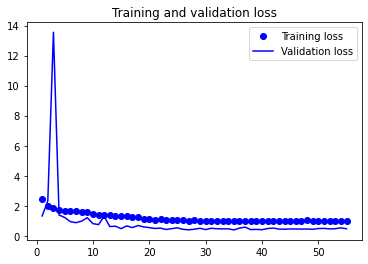

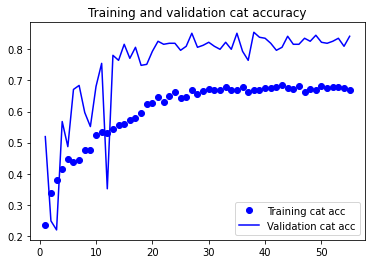

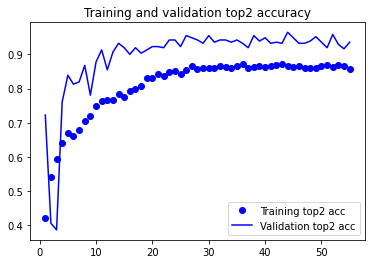

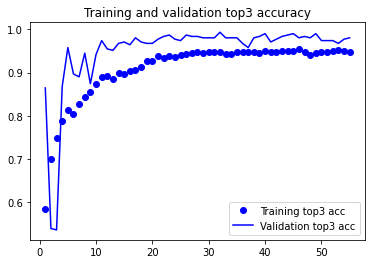

In [45]:
# get the metric names so we can use evaulate_generator
model_EB0.metrics_names

# Here the the last epoch will be used.

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model_EB0.evaluate_generator(test_batches, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

# Here the best epoch will be used.

model_EB0.load_weights('model_EB0.h5')

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model_EB0.evaluate_generator(test_batches, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)


# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training cat acc')
plt.plot(epochs, val_acc, 'b', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top2_acc, 'bo', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'b', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_top3_acc, 'bo', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'b', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()


plt.show()

remove hair

## **Create a Confusion Matrix**

In [46]:
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


## **EfficientB0**

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1103/1103 [==============================] - 15s 13ms/step
Confusion matrix, without normalization
[[ 10   5   8   0   7   0   0]
 [  2  27   1   3   1   1   0]
 [  0   2  50   0  26   9   1]
 [  0   0   0   5   1   2   0]
 [  0   0   5   4  32   4   1]
 [  0  10  30   4  70 769   0]
 [  0   1   0   0   0   1  11]]


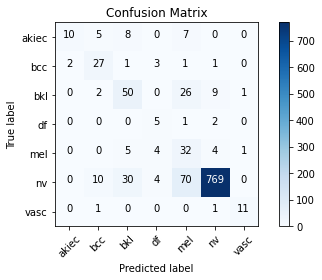

In [47]:
# Get the labels of the test images.

test_labels = test_batches.classes
# We need these to plot the confusion matrix.
test_labels

# Print the label associated with each class
test_batches.class_indices

# make a prediction
predictions = model_EB0.predict_generator(test_batches, steps=len(df_val), verbose=1)

test_labels.shape
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))
test_batches.class_indices

# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

## **Generate the Classification Report**

## **EfficientB0**

In [60]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       0.54      0.43      0.48        30
         bcc       0.57      0.86      0.68        35
         bkl       0.55      0.39      0.45        88
          df       0.21      0.50      0.30         8
         mel       0.25      0.76      0.38        46
          nv       0.97      0.87      0.92       883
        vasc       1.00      1.00      1.00        13

    accuracy                           0.82      1103
   macro avg       0.58      0.69      0.60      1103
weighted avg       0.88      0.82      0.84      1103



In [48]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

# 225 300

              precision    recall  f1-score   support

       akiec       0.83      0.33      0.48        30
         bcc       0.60      0.77      0.68        35
         bkl       0.53      0.57      0.55        88
          df       0.31      0.62      0.42         8
         mel       0.23      0.70      0.35        46
          nv       0.98      0.87      0.92       883
        vasc       0.85      0.85      0.85        13

    accuracy                           0.82      1103
   macro avg       0.62      0.67      0.60      1103
weighted avg       0.89      0.82      0.84      1103



mini sample 4000 2500


In [ ]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       0.56      0.47      0.51        30
         bcc       0.60      0.83      0.70        35
         bkl       0.58      0.44      0.50        88
          df       0.18      0.25      0.21         8
         mel       0.27      0.78      0.40        46
          nv       0.97      0.88      0.92       883
        vasc       1.00      0.77      0.87        13

    accuracy                           0.83      1103
   macro avg       0.59      0.63      0.59      1103
weighted avg       0.88      0.83      0.84      1103



64kb original


In [ ]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       0.58      0.47      0.52        30
         bcc       0.63      0.69      0.66        35
         bkl       0.69      0.40      0.50        88
          df       0.00      0.00      0.00         8
         mel       0.38      0.65      0.48        46
          nv       0.94      0.96      0.95       883
        vasc       0.83      0.77      0.80        13

    accuracy                           0.87      1103
   macro avg       0.58      0.56      0.56      1103
weighted avg       0.87      0.87      0.86      1103



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


remove hair

In [ ]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       0.53      0.53      0.53        30
         bcc       0.51      0.66      0.57        35
         bkl       0.62      0.11      0.19        88
          df       0.00      0.00      0.00         8
         mel       0.24      0.72      0.36        46
          nv       0.94      0.92      0.93       883
        vasc       0.90      0.69      0.78        13

    accuracy                           0.82      1103
   macro avg       0.54      0.52      0.48      1103
weighted avg       0.85      0.82      0.82      1103



In [ ]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       0.75      0.30      0.43        30
         bcc       0.62      0.60      0.61        35
         bkl       0.54      0.39      0.45        88
          df       0.00      0.00      0.00         8
         mel       0.31      0.63      0.41        46
          nv       0.94      0.95      0.95       883
        vasc       0.92      0.85      0.88        13

    accuracy                           0.85      1103
   macro avg       0.58      0.53      0.53      1103
weighted avg       0.86      0.85      0.85      1103



b3

In [ ]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       0.62      0.27      0.37        30
         bcc       0.60      0.69      0.64        35
         bkl       0.45      0.33      0.38        88
          df       0.00      0.00      0.00         8
         mel       0.35      0.54      0.43        46
          nv       0.94      0.95      0.94       883
        vasc       0.63      0.92      0.75        13

    accuracy                           0.85      1103
   macro avg       0.51      0.53      0.50      1103
weighted avg       0.84      0.85      0.84      1103



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Reduce the sample**

train reduce 4000 from nv, val reduce 800 from nv

original


In [ ]:
hair remove

hair remove

In [ ]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       0.56      0.33      0.42        30
         bcc       0.57      0.80      0.67        35
         bkl       0.68      0.44      0.54        88
          df       1.00      0.25      0.40         8
         mel       0.44      0.74      0.55        46
          nv       0.83      0.87      0.85        83
        vasc       0.92      0.92      0.92        13

    accuracy                           0.65       303
   macro avg       0.71      0.62      0.62       303
weighted avg       0.68      0.65      0.64       303



top3

In [ ]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       0.67      0.33      0.44        30
         bcc       0.67      0.80      0.73        35
         bkl       0.91      0.11      0.20        88
          df       0.25      0.25      0.25         8
         mel       0.33      0.89      0.49        46
          nv       0.78      0.86      0.82        83
        vasc       1.00      1.00      1.00        13

    accuracy                           0.58       303
   macro avg       0.66      0.61      0.56       303
weighted avg       0.72      0.58      0.53       303



# **Tensorflow lite**

In [ ]:
!unzip '/content/drive/MyDrive/5703File/DataSet/dataverse_files/model_EB0.zip' -d '/content/'

Archive:  /content/drive/MyDrive/5703File/DataSet/dataverse_files/model_EB0.zip
replace /content/model_EB0.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
#Load Model 
model_EfficientB0 = keras.models.load_model('/content/model_EB0.h5', custom_objects={'categorical_accuracy': categorical_accuracy,'top_2_accuracy': top_2_accuracy,'top_3_accuracy': top_3_accuracy})

In [ ]:
# try to make a prediction 
predictions = model_EfficientB0.predict(test_batches, steps=len(df_val), verbose=1)

1103/1103 [==============================] - 29s 11ms/step


In [ ]:
predictions[0]

array([0.24588661, 0.2050323 , 0.16516887, 0.01273716, 0.00088755,
       0.34489632, 0.02539122], dtype=float32)

In [ ]:
#save model
model_EfficientB0.save("/content/model_EfficientB0")

INFO:tensorflow:Assets written to: /content/model_EfficientB0/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# convert model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/model_EfficientB0')
tflite_model = converter.convert()
open("/content/converted_model.tflite", "wb").write(tflite_model)

************************************************************************
Test convert model
************************************************************************

In [ ]:
##choose one picture
img = cv2.imread('/content/HAM10000_images_part_1/ISIC_0024307.jpg')
img = cv2.resize(img, (224 ,224))
img = np.array(img, dtype="float32")
img = np.reshape(img, (1,224,224,3))

In [ ]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='/content/converted_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']

print("*"*50, input_details)
interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

************************************************** [{'name': 'serving_default_input_2:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[[3.1031541e-06 3.6106812e-04 8.8327369e-03 1.1285768e-03 4.1629869e-04
  1.3486953e-01 8.5438871e-01]]


In [ ]:
output_data

array([[3.1031541e-06, 3.6106812e-04, 8.8327369e-03, 1.1285768e-03,
        4.1629869e-04, 1.3486953e-01, 8.5438871e-01]], dtype=float32)

In [ ]:
model_EfficientB0.predict(img)

array([[3.1031452e-06, 3.6106523e-04, 8.8326782e-03, 1.1285624e-03,
        4.1629534e-04, 1.3486871e-01, 8.5438961e-01]], dtype=float32)